# Causal Modelling

## Importing working Libraries and Scripts

In [9]:
import warnings
# silence warnings
warnings.filterwarnings("ignore")

from causalnex.structure import StructureModel
import pandas as pd


In [2]:
# Creating a Structural Model
sm = StructureModel()

In [3]:
sm.add_edges_from([
    ('health', 'absences'),
    ('health', 'G1')
])


In [4]:
sm.edges

OutEdgeView([('health', 'absences'), ('health', 'G1')])

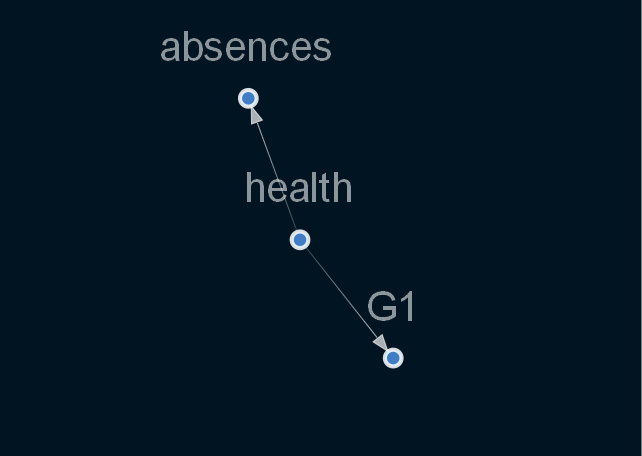

In [8]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))


In [10]:
data_1 = pd.read_csv('../data/out_removed_minmax_scale.csv')

In [11]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          483 non-null    int64  
 1   diagnosis                   483 non-null    int64  
 2   radius_mean                 483 non-null    float64
 3   texture_mean                483 non-null    float64
 4   perimeter_mean              483 non-null    float64
 5   area_mean                   483 non-null    float64
 6   smoothness_mean             483 non-null    float64
 7   compactness_mean            483 non-null    float64
 8   concavity_mean              483 non-null    float64
 9   concave points_mean         483 non-null    float64
 10  symmetry_mean               483 non-null    float64
 11  fractal_dimension_mean      483 non-null    float64
 12  radius_se                   483 non-null    float64
 13  texture_se                  483 non

In [22]:
# Constructing Causality Graph from Dataframe
from causalnex.structure.notears import from_pandas
sm = from_pandas(data_1.iloc[:,1:10])

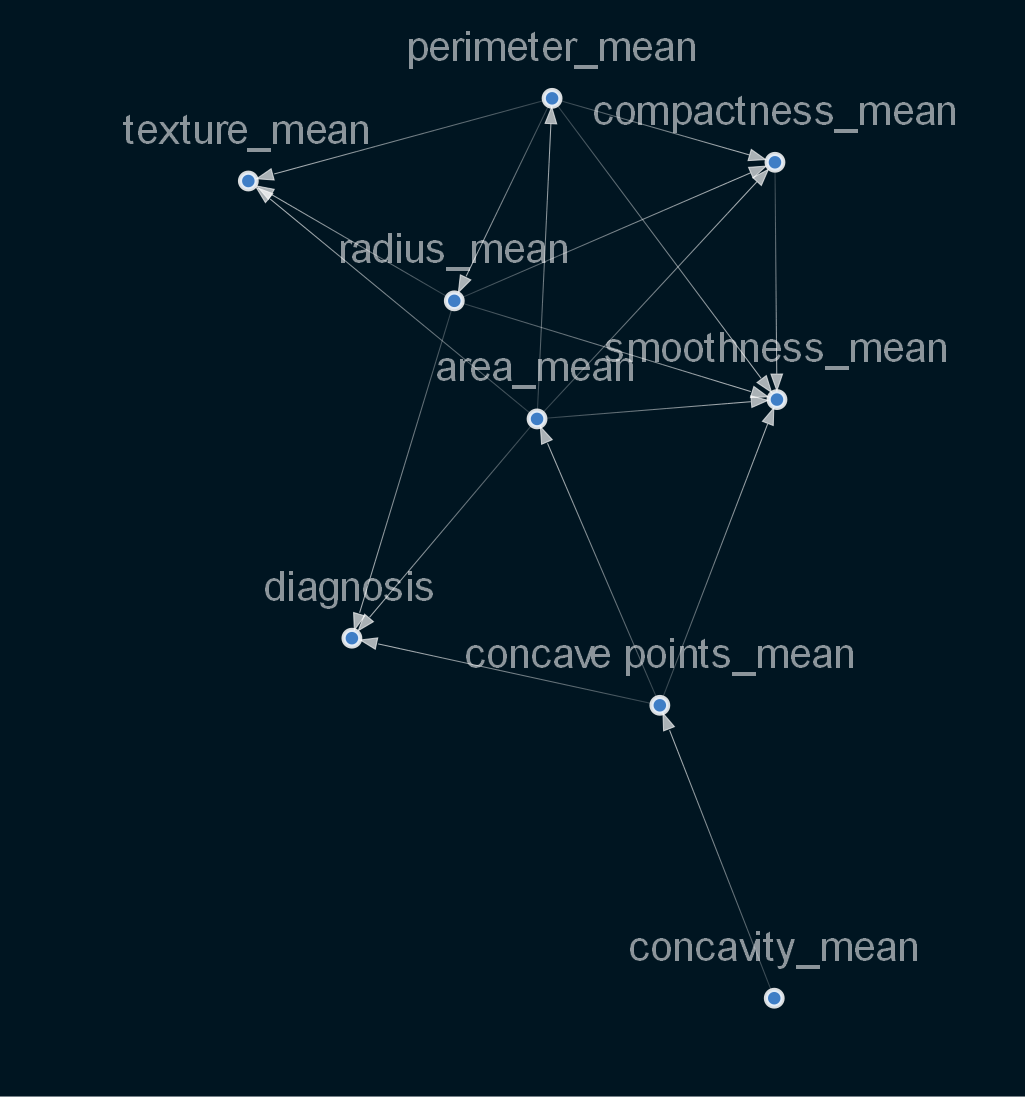

In [27]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "1"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))
